### Authentication and enabling GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# Tensorflow is already installed in Colab
# check if tensorflow is installed
import tensorflow as tf
print(tf.__version__) 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('you must enable GPU! Go to:')
  print('\nRuntime')
  print('\tChange runtime type')
  print('\t\tHardware Accelerator: GPU')

  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.0
Found GPU at: /device:GPU:0


### Loading Dataset

In [ ]:
import os
import numpy as np
import os.path
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

BATCH_SIZE = 36 
NUMBER_CLASSES = 33
PATIENCE = 10
IMAGE_HEIGHT = 299
IMAGE_WIDTH = 299
EPOCH = 40

PATH_HOME = '/content/drive/Shareddrives/MIRCV/'
PATH_DATASET = '/content/drive/Shareddrives/MIRCV/dataset/preprocessed'
PATH_DATASET_PROVA = '/content/drive/Shareddrives/MIRCV/dataset/preprocessedProva'


In [ ]:
from pathlib import Path
dir = Path(PATH_DATASET)
filepaths = list(dir.glob(r'**/*.*'))

print(filepaths)

labels = [str(filepaths[i]).split("/")[-2] for i in range(len(filepaths))]
print(labels)



[PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_0.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_3.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_4.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_5.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_6.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_7.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_8.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_9.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_51.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_53.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_54.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/i

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = filepaths
y = labels

#X = ['path1','path2','path3','path4','path5','path6', 'path7','path8','path9','path10','path11']

#y = ['apple','apple','banana','banana','apple','apple','banana','banana','cucumber','cucumber','cucumber']

#Generate train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)



print(X_train)
print(y_train)
print(X_test)
print(y_test)

def build_pandas_dataframe(X,y):
  filepath = pd.Series(X, name='Filepath').astype(str)
  labels = pd.Series(y, name='Label')

  # Concatenate filepaths and labels
  df = pd.concat([filepath, labels], axis=1)

  # Shuffle the DataFrame and reset index
  #df = df.sample(frac=1).reset_index(drop = True) #This could be avoid because another shuffle will be done during ImgageDataGenerator.
  return df

df_train = build_pandas_dataframe(X_train,y_train)
df_test = build_pandas_dataframe(X_test,y_test)


print(df_train)
print(df_test)

[PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/pineapple/img_276.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/jalapeno/img_3575.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/jalapeno/img_3577.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/cucumber/img_2376.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/lemon/img_381.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_1305.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/spinach/img_623.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/mango/img_1183.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/eggplant/img_3904.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/jalapeno/img_300.jpg'), PosixPath('/content/drive/Shareddrives/MIRCV/dataset/preprocessed/pineapple/img_2493.JPG'), PosixPath('

In [ ]:
df_train_group = df_train.groupby(["Label"])["Filepath"].count().reset_index(name="Count")
df_test_group = df_test.groupby(["Label"])["Filepath"].count().reset_index(name="Count")
#df2['Count'].astype(int)

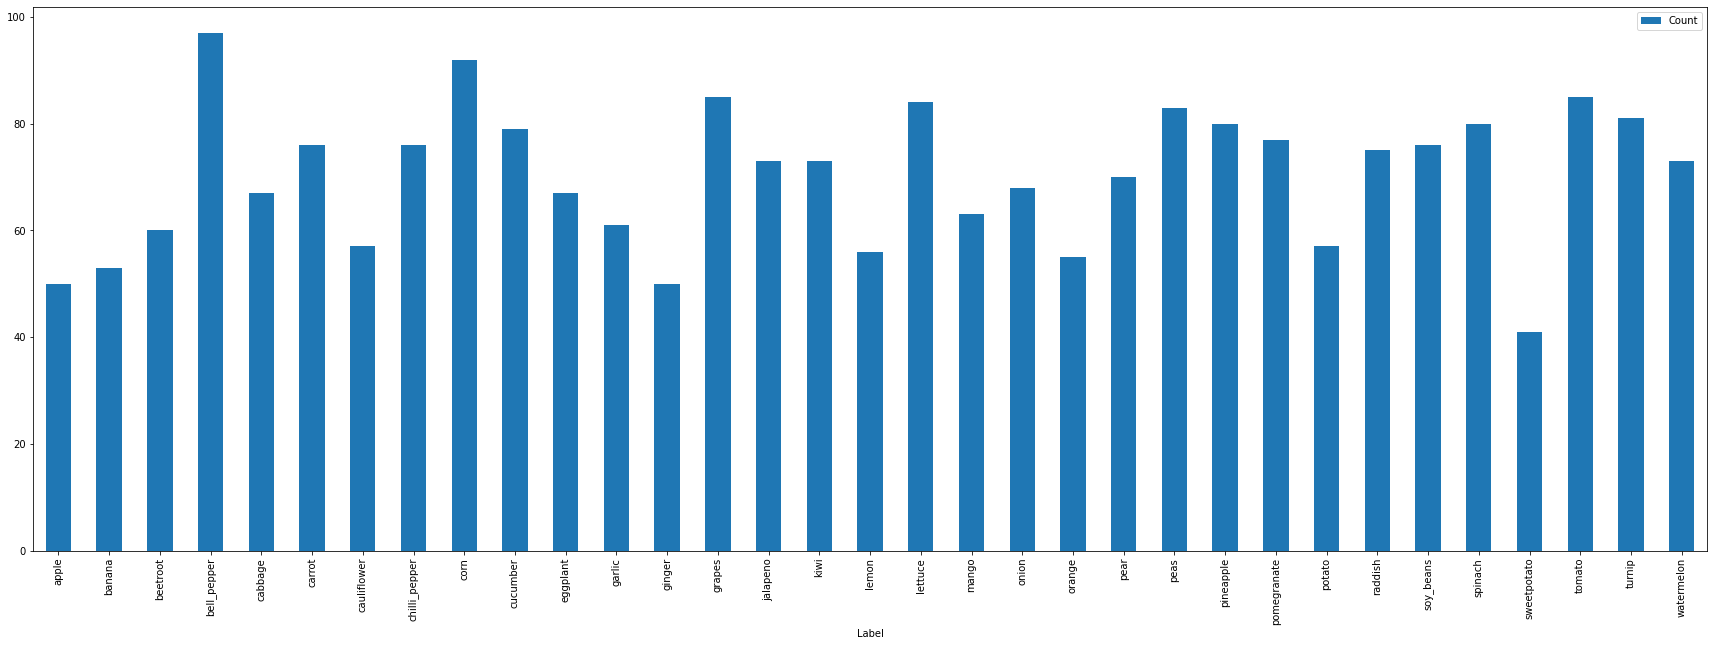

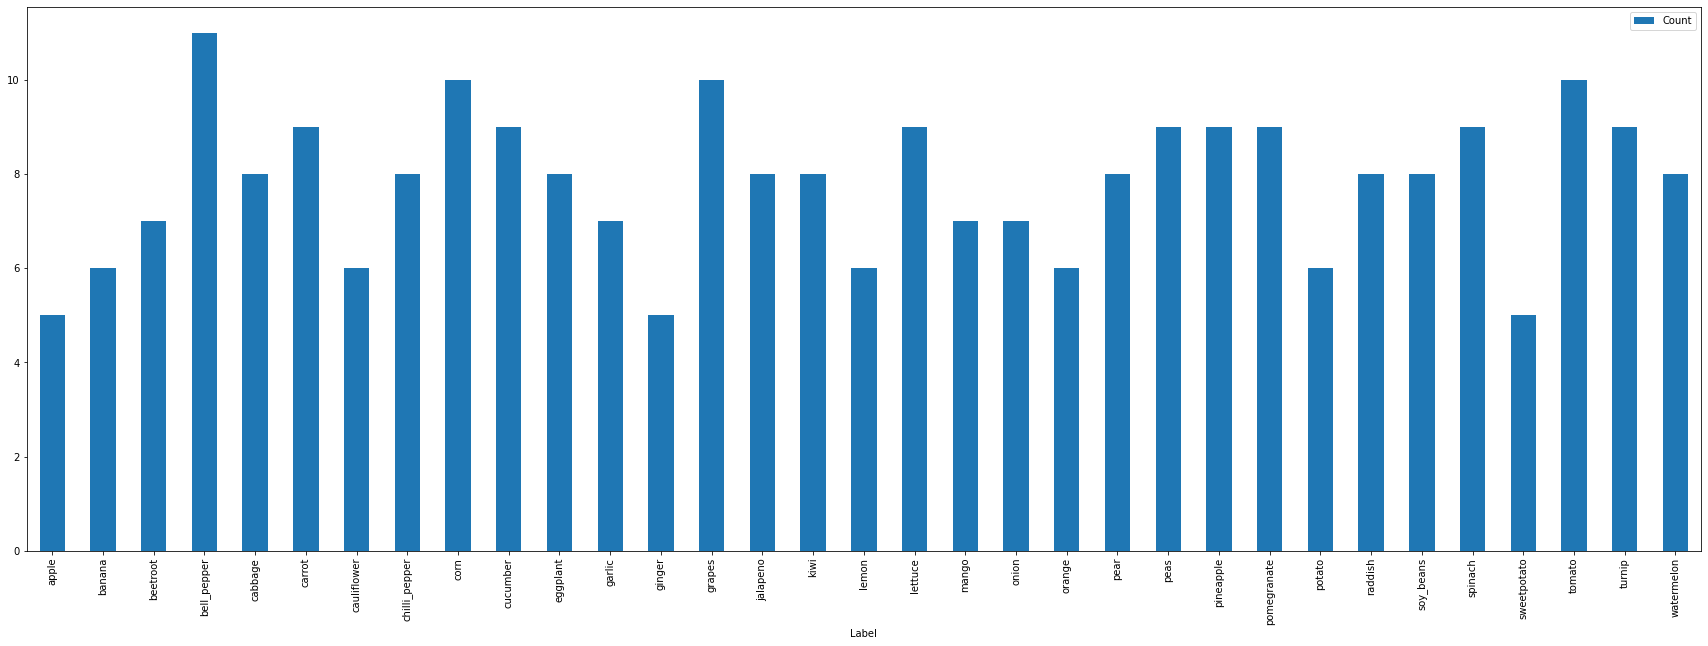

In [ ]:
# Plot experiments
#df.groupby(["item", "color"])["id"].count().reset_index(name="count")
#df.groupby(['revenue','session','user_id'])['user_id'].count()
df_train_group.plot(x='Label',y='Count', kind='bar' , figsize = (30,10))
df_test_group.plot(x='Label',y='Count', kind='bar' , figsize = (30,10))




In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(
       #rescale= 1. / 255.0,
       validation_split=0.20
)

test_datagenerator = ImageDataGenerator()#rescale= 1. / 255.0) 

In [ ]:
train_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    subset= "training",
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)


val_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset= "validation",
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)



test_images = test_datagenerator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    seed=0,
    batch_size=1,
    shuffle=False   
)

Found 1856 validated image filenames belonging to 33 classes.
Found 464 validated image filenames belonging to 33 classes.
Found 258 validated image filenames belonging to 33 classes.


In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("horizontal"), 
  layers.RandomRotation(0.3),  
  layers.RandomZoom(0.2), 
  ]
)

### Inception V3 Network

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from keras import backend as K
K.clear_session()

conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
conv_base.trainable = False
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
import numpy as np
import random as rn
np.random.seed(0)
rn.seed(0)
tf.random.set_seed(0)

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(33, activation="softmax")(x)
model = keras.Model(inputs,outputs)



model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'NonToccare-Model1-TrainedClassifier.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='min',
                                                 patience=PATIENCE
                                                 )

In [ ]:
history = model.fit(
      x = train_images,
      validation_data = val_images,
      epochs=10,
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


14/52 [=======>......................] - ETA: 11:02 - loss: 4.7454 - accuracy: 0.2213

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


52/52 [==============================] - ETA: 0s - loss: 2.6110 - accuracy: 0.4515 
Epoch 1: val_loss improved from inf to 0.88546, saving model to /content/drive/Shareddrives/MIRCV//models/NonToccare-Model1-TrainedClassifier.h5
52/52 [==============================] - 1307s 25s/step - loss: 2.6110 - accuracy: 0.4515 - val_loss: 0.8855 - val_accuracy: 0.7284
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.1205 - accuracy: 0.6929
Epoch 2: val_loss improved from 0.88546 to 0.85868, saving model to /content/drive/Shareddrives/MIRCV//models/NonToccare-Model1-TrainedClassifier.h5
52/52 [==============================] - 107s 2s/step - loss: 1.1205 - accuracy: 0.6929 - val_loss: 0.8587 - val_accuracy: 0.7586
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.8784 - accuracy: 0.7597
Epoch 3: val_loss improved from 0.85868 to 0.75276, saving model to /content/drive/Shareddrives/MIRCV//models/NonToccare-Model1-TrainedClassifier.h5
52/52 [================

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 299, 299, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 299, 299, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

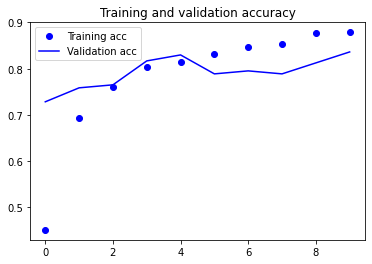

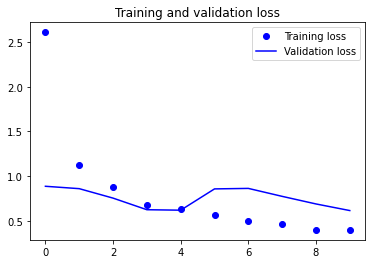

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images)
test_acc

121/258 [=============>................] - ETA: 1:19 - loss: 0.4495 - accuracy: 0.8760

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 146s 563ms/step - loss: 0.5542 - accuracy: 0.8527


0.8527131676673889

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 85.27%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=sorted(set(y_test)),output_dict = True)['weighted avg'])

{'precision': 0.8884580611666795, 'recall': 0.8527131782945736, 'f1-score': 0.8507525289322556, 'support': 258}


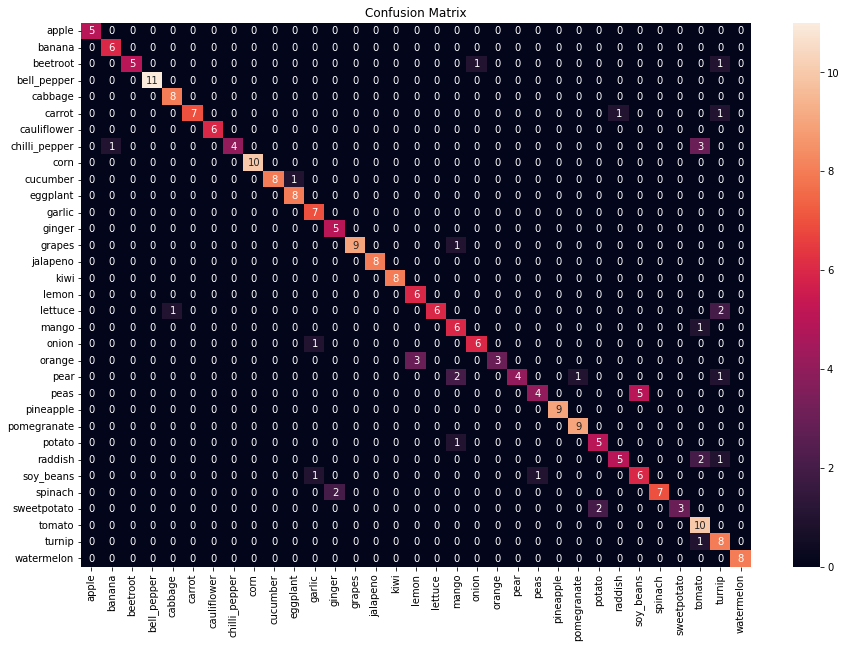

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Confusion Matrix')
plt.show()

##Training fine-tuned models

In [ ]:
#1. try to use the prof code but implementing our pretrained network
##1.1 we want obtain two different features by model1-finetuned and model2-finetuned
#2. if 1 works implementing it using EarlyStopping technique

In [ ]:
from keras import backend as K
K.clear_session()

conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

conv_base.trainable = False

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(33, activation="softmax")(x)
model = keras.Model(inputs,outputs)



model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'weights_fe')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      save_weights_only=True,
                      verbose=1,
                      save_best_only=True)

                  ]
#earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                 mode='min',
#                                                 patience=PATIENCE
#                                                 )

history = model.fit(
      x = train_images,
      validation_data = val_images,
      epochs=10,
      callbacks =  [callbacks_list], #earlyStopping has been removed
      batch_size = BATCH_SIZE
)



In [ ]:

dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'weights_fe')

# load best model on validation accuracy
model.load_weights(save_path)

test_loss, test_acc = model.evaluate(test_images)
print(test_loss)
print(test_acc)

212/258 [=======================>......] - ETA: 3s - loss: 0.3224 - accuracy: 0.8774

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 20s 77ms/step - loss: 0.3001 - accuracy: 0.8798
0.3000885844230652
0.8798449635505676


### Fine Tuning Model 1

In [ ]:
# FINE TUNED MODEL 1
model.load_weights(save_path)

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
    #if layer.name == 'conv2d_87':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# make train reproducible
tf.keras.utils.set_random_seed(42)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'weights_ft1')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      save_weights_only=True,
                      verbose=1,
                      save_best_only=True)

                  ]
#earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                 mode='min',
#                                                 patience=PATIENCE
#                                                 )

history = model.fit(
      x = train_images,
      validation_data = val_images,
      epochs=10,
      callbacks =  [callbacks_list], #earlyStopping has been removed
      batch_size = BATCH_SIZE
)

Epoch 1/10
 7/52 [===>..........................] - ETA: 1:00 - loss: 1.3272 - accuracy: 0.7698

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/52 [============>.................] - ETA: 41s - loss: 0.7615 - accuracy: 0.8299

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


52/52 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.8497
Epoch 1: val_loss improved from inf to 0.78987, saving model to /content/drive/Shareddrives/MIRCV//models/weights_ft1
52/52 [==============================] - 114s 2s/step - loss: 0.6125 - accuracy: 0.8497 - val_loss: 0.7899 - val_accuracy: 0.8233
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 0.3608 - accuracy: 0.8949
Epoch 2: val_loss improved from 0.78987 to 0.63418, saving model to /content/drive/Shareddrives/MIRCV//models/weights_ft1
52/52 [==============================] - 104s 2s/step - loss: 0.3608 - accuracy: 0.8949 - val_loss: 0.6342 - val_accuracy: 0.8534
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8976
Epoch 3: val_loss improved from 0.63418 to 0.61749, saving model to /content/drive/Shareddrives/MIRCV//models/weights_ft1
52/52 [==============================] - 104s 2s/step - loss: 0.3152 - accuracy: 0.8976 - val_loss: 0.6175 

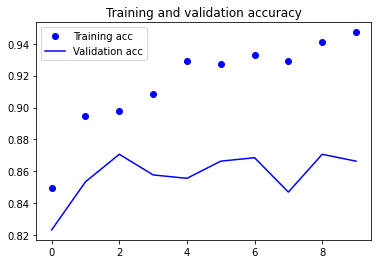

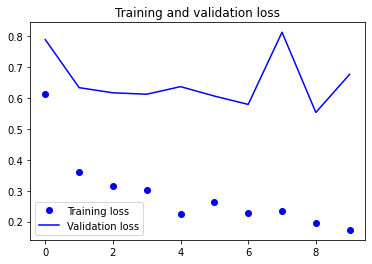

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images)
test_acc

121/258 [=============>................] - ETA: 9s - loss: 0.2962 - accuracy: 0.9008

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 16s 62ms/step - loss: 0.3729 - accuracy: 0.9031


0.9031007885932922

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 90.31%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=sorted(set(y_test)),output_dict = True)['weighted avg'])

{'precision': 0.920611150262313, 'recall': 0.9031007751937985, 'f1-score': 0.8998932110745259, 'support': 258}


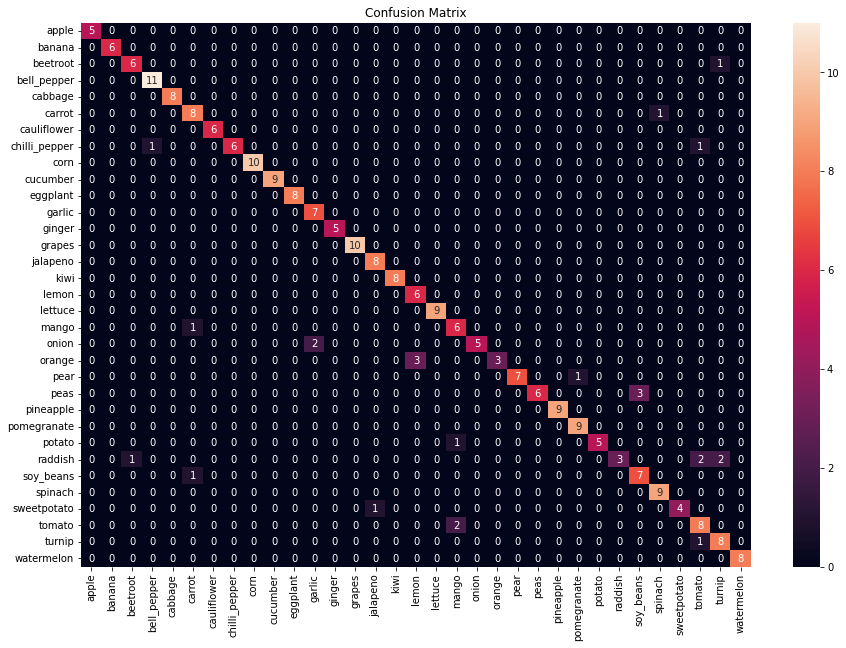

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# load best model on validation accuracy
model.load_weights(save_path)

test_loss, test_acc = model.evaluate(test_images)
print(test_loss)
print(test_acc)

212/258 [=======================>......] - ETA: 3s - loss: 0.4123 - accuracy: 0.8915

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 19s 73ms/step - loss: 0.4094 - accuracy: 0.8915
0.40943214297294617
0.8914728760719299


### Fine Tuning Model 2

In [ ]:
# FINE TUNED MODEL 2
'''
from keras import backend as K
K.clear_session()

conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

conv_base.trainable = False

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(33, activation="softmax")(x)

model = keras.Model(inputs,outputs)

dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)

path1 = os.path.join(dir_name,'weights_fe')
model.load_weights(path1)

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

conv_base.trainable = True

test_loss, test_acc = model.evaluate(test_images)
print(test_loss)
print(test_acc)
'''
set_trainable = False
for layer in conv_base.layers:
    #if layer.name == 'conv2d_93':
    if layer.name == 'conv2d_87':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# make train reproducible
tf.keras.utils.set_random_seed(42)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'weights_ft2')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      save_weights_only=True,
                      verbose=1,
                      save_best_only=True)

                  ]
#earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                 mode='min',
#                                                 patience=PATIENCE
#                                                 )

history = model.fit(
      x = train_images,
      validation_data = val_images,
      epochs=10,
      callbacks =  [callbacks_list], #earlyStopping has been removed
      batch_size = BATCH_SIZE
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/52 [=========>....................] - ETA: 55s - loss: 1.1415 - accuracy: 0.7968

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


52/52 [==============================] - ETA: 0s - loss: 0.8331 - accuracy: 0.8378
Epoch 1: val_loss improved from inf to 0.88844, saving model to /content/drive/Shareddrives/MIRCV//models/weights_ft2
52/52 [==============================] - 116s 2s/step - loss: 0.8331 - accuracy: 0.8378 - val_loss: 0.8884 - val_accuracy: 0.8578
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.9019
Epoch 2: val_loss did not improve from 0.88844
52/52 [==============================] - 104s 2s/step - loss: 0.3871 - accuracy: 0.9019 - val_loss: 1.3186 - val_accuracy: 0.8103
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.9246
Epoch 3: val_loss improved from 0.88844 to 0.79519, saving model to /content/drive/Shareddrives/MIRCV//models/weights_ft2
52/52 [==============================] - 103s 2s/step - loss: 0.3001 - accuracy: 0.9246 - val_loss: 0.7952 - val_accuracy: 0.8599
Epoch 4/10
52/52 [==============================] - 

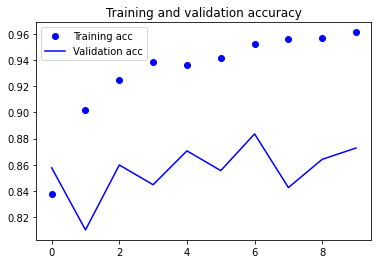

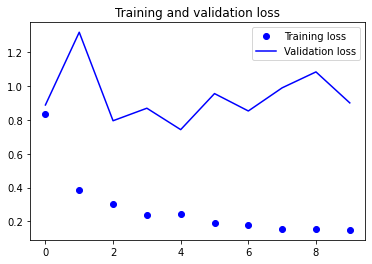

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images)
test_acc

120/258 [============>.................] - ETA: 10s - loss: 0.5639 - accuracy: 0.8833

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 17s 65ms/step - loss: 0.6270 - accuracy: 0.8953


0.895348846912384

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 89.53%


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=sorted(set(y_test)),output_dict = True)['weighted avg'])

{'precision': 0.9091041925344251, 'recall': 0.8953488372093024, 'f1-score': 0.8898438083861644, 'support': 258}


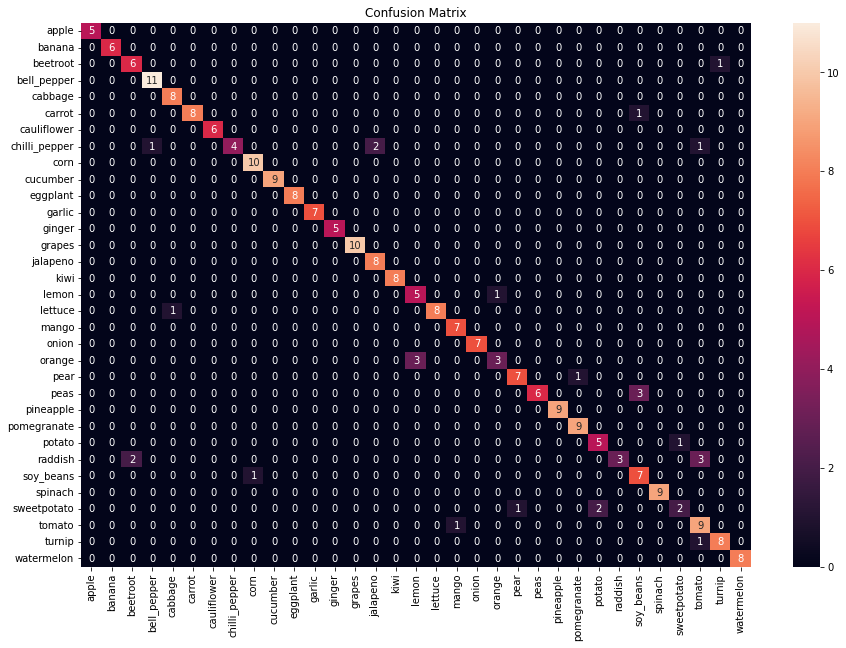

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# load best model on validation accuracy
model.load_weights(save_path)

test_loss, test_acc = model.evaluate(test_images)
print(test_loss)
print(test_acc)

212/258 [=======================>......] - ETA: 3s - loss: 0.6803 - accuracy: 0.8962

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


258/258 [==============================] - 19s 75ms/step - loss: 0.6047 - accuracy: 0.8953
0.6046648621559143
0.895348846912384


### Comparing features

In [ ]:
conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

conv_base.trainable = False

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(33, activation="softmax")(x)
model = keras.Model(inputs,outputs)

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)

path1 = os.path.join(dir_name,'weights_ft1')
path2 = os.path.join(dir_name,'weights_ft2')

model.summary()

conv_base.trainable = False

# method B
m = tf.keras.models.clone_model(model)
m.load_weights(path1)
extractor_1 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('dense').output)
#extractor_1 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('global_average_pooling2d').output)

# method C
m = tf.keras.models.clone_model(model)
m.load_weights(path2)
extractor_2 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('dense').output)
#extractor_2 = tf.keras.models.Model(inputs=m.inputs, outputs=m.get_layer('global_average_pooling2d').output)


"""
extractor_1.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

extractor_2.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

test_loss, test_acc = extractor_1.evaluate(test_images)
print(test_loss)
print(test_acc)


test_loss, test_acc = extractor_2.evaluate(test_images)
print(test_loss)
print(test_acc)
"""

NameError: ignored

In [ ]:
extractor_1.summary()
extractor_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0   

## Features and VPTree Index

### Extracting features

In [ ]:
def load_image_tf(path):
    image_pil = tf.keras.utils.load_img(path, target_size=input_shape,interpolation='bilinear')
    image_np = tf.keras.preprocessing.image.img_to_array(image_pil) 
    #x = tf.keras.applications.inception_v3.preprocess_input(image_np)
    x = np.expand_dims(x, axis=0)
    return x

### Esperiment: Two inception_v3.preprocess_input in cascade


['/content/drive/Shareddrives/MIRCV/dataset/preprocessed/jalapeno/img_302.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/corn/img_6.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/cauliflower/img_1576.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/chilli_pepper/img_2233.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/raddish/img_3387.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/lemon/img_430.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/chilli_pepper/img_2156.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/potato/img_3141.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/potato/img_3121.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/raddish/img_348.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/apple/img_3292.jpg', '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/eggplant/img_3914.jpg', '/content/drive/Shareddrives/MIRCV/dataset/prepr

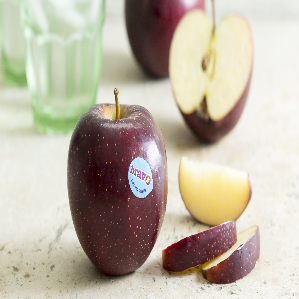

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.5686275  0.7254902  0.5137255 ]
 [0.5686275  0.70980394 0.5058824 ]
 [0.58431375 0.70980394 0.5058824 ]
 [0.5921569  0.7019608  0.52156866]
 [0.6        0.70980394 0.5294118 ]
 [0.60784316 0.7019608  0.5294118 ]
 [0.60784316 0.7019608  0.5294118 ]
 [0.60784316 0.7019608  0.5294118 ]
 [0.6156863  0.70980394 0.5372549 ]
 [0.60784316 0.7019608  0.5294118 ]]
[[-0.9955402  -0.9943099  -0.9959708 ]
 [-0.9955402  -0.9944329  -0.9960323 ]
 [-0.9954171  -0.9944329  -0.9960323 ]
 [-0.9953556  -0.99449444 -0.9959093 ]
 [-0.9952941  -0.9944329  -0.99584776]
 [-0.9952326  -0.99449444 -0.99584776]
 [-0.9952326  -0.99449444 -0.99584776]
 [-0.9952326  -0.99449444 -0.99584776]
 [-0.99517107 -0.9944329  -0.99578625]
 [-0.9952326  -0.99449444 -0.99584776]]


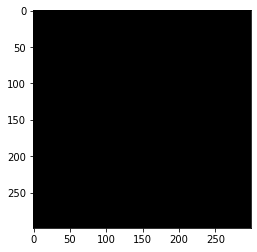

In [ ]:
print(list(df_train.Filepath))
print(list(df_test.Filepath))

paths = df_train.Filepath
print(paths[100])

input_shape = (299,299,3)
from IPython.display import Image, display
from matplotlib import pyplot as plt
#display(Image(paths[100]))
path1 = '/content/drive/Shareddrives/MIRCV/dataset/mirflickr25k/mirflickr/im19012.jpg'
path2 = '/content/drive/Shareddrives/MIRCV/dataset/preprocessed/apple/img_3294.jpg'


image_pil = tf.keras.utils.load_img(path2, target_size=input_shape)
display(image_pil)

image_np = tf.keras.preprocessing.image.img_to_array(image_pil)
x = tf.keras.applications.inception_v3.preprocess_input(image_np)

print(x[0,:10,:10])
x = tf.keras.applications.inception_v3.preprocess_input(x)
print(x[0,:10,:10])

plt.imshow(x, interpolation='nearest')
plt.show()

#x = tf.keras.applications.inception_v3.preprocess_input(image_pil)
#display(x)

### Generating new features

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from keras import backend as K
K.clear_session()

#Modello base
model_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    pooling = "avg",
    input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
#model_base.summary()


dir = os.path.join(PATH_HOME,"models")
#Modello finetuned
model_tmp = keras.models.load_model(os.path.join(dir,"NonToccare-Model2-FineTuned.h5"))
model_tmp.summary()

model_ft = keras.Model(inputs=model_tmp.input,outputs=model_tmp.get_layer(name="global_average_pooling2d_1").output) #name="dense"

model_ft.summary()



87924736/87910968 [==============================] - 1s 0us/step


OSError: ignored

In [ ]:
class Point:
  def __init__(self, features, img_id, label):
    self.features = features
    self.img_id = img_id
    self.label = label
    
def load_image_tf_base(path):
    image_pil = tf.keras.utils.load_img(path, target_size=input_shape,interpolation='bilinear')
    image_np = tf.keras.preprocessing.image.img_to_array(image_pil) 
    x = tf.keras.applications.inception_v3.preprocess_input(image_np)
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(image_np, axis=0)
    return x

def load_image_tf_fine_tuning(path):
    image_pil = tf.keras.utils.load_img(path, target_size=input_shape,interpolation='bilinear')
    image_np = tf.keras.preprocessing.image.img_to_array(image_pil) 
    #x = tf.keras.applications.inception_v3.preprocess_input(image_np)
    #x = np.expand_dims(x, axis=0)
    x = np.expand_dims(image_np, axis=0)
    return x

def get_featurePoints_from_images_base(paths,model,max):
  points_list = []
  i = 0
  for path in paths:
    label = str(path).split('/')[-2]
    if(label == "mirflickr"):
      label = "noise"
    img_id = str(path).split('/')[-1]
    np_img = load_image_tf_base(path)
    features = model.predict(np_img, verbose=0)
    points_list.append(Point(features, img_id, label))
    i = i + 1   
    print(i,"-Ho convertito immagine: ",img_id, "label: ", label)
    if(i == max):
      break
  return points_list


def get_featurePoints_from_images_fine_tuning(paths,model,max):
  points_list = []
  i = 0
  for path in paths:
    label = str(path).split('/')[-2]
    if(label == "mirflickr"):
      label = "noise"
    img_id = str(path).split('/')[-1]
    np_img = load_image_tf_fine_tuning(path)
    features = model.predict(np_img, verbose=0)
    points_list.append(Point(features, img_id, label))
    i = i + 1   
    print(i,"-Ho convertito immagine: ",img_id, "label: ", label)
    if(i == max):
      break
  return points_list

In [ ]:
dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
print(dir)
filepaths = list(dir.glob(r'*.jpg'))
print(len(filepaths))
noise_list = ["noise"] * len(filepaths)

print(noise_list)
print(len(noise_list))

df_mirflickr = build_pandas_dataframe(filepaths,noise_list)

print(df_mirflickr)

/content/drive/Shareddrives/MIRCV/dataset/mirflickr25k/mirflickr
25000
['noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', 'noise', '

In [ ]:
frames = [df_train[:200],df_test[:200],df_mirflickr[:200]]
total_dataframe = pd.concat(frames, ignore_index=True)
input_shape = (299,299,3)
print(total_dataframe)

                                              Filepath        Label
0    /content/drive/Shareddrives/MIRCV/dataset/prep...  cauliflower
1    /content/drive/Shareddrives/MIRCV/dataset/prep...      lettuce
2    /content/drive/Shareddrives/MIRCV/dataset/prep...       grapes
3    /content/drive/Shareddrives/MIRCV/dataset/prep...  cauliflower
4    /content/drive/Shareddrives/MIRCV/dataset/prep...    soy_beans
..                                                 ...          ...
595  /content/drive/Shareddrives/MIRCV/dataset/mirf...        noise
596  /content/drive/Shareddrives/MIRCV/dataset/mirf...        noise
597  /content/drive/Shareddrives/MIRCV/dataset/mirf...        noise
598  /content/drive/Shareddrives/MIRCV/dataset/mirf...        noise
599  /content/drive/Shareddrives/MIRCV/dataset/mirf...        noise

[600 rows x 2 columns]


In [ ]:
points_base = get_featurePoints_from_images_base(total_dataframe.Filepath,model_base,600)

1 -Ho convertito immagine:  img_1589.jpg label:  cauliflower
2 -Ho convertito immagine:  img_1423.jpg label:  lettuce
3 -Ho convertito immagine:  img_3187.jpg label:  grapes
4 -Ho convertito immagine:  img_1574.jpg label:  cauliflower
5 -Ho convertito immagine:  img_999.jpg label:  soy_beans
6 -Ho convertito immagine:  img_892.jpg label:  garlic
7 -Ho convertito immagine:  img_3386.jpg label:  raddish
8 -Ho convertito immagine:  img_2273.jpg label:  onion
9 -Ho convertito immagine:  img_1595.jpg label:  cauliflower
10 -Ho convertito immagine:  img_1057.jpg label:  bell_pepper
11 -Ho convertito immagine:  img_1466.jpg label:  orange
12 -Ho convertito immagine:  img_3104.jpg label:  potato
13 -Ho convertito immagine:  img_637.jpg label:  spinach
14 -Ho convertito immagine:  img_2662.jpg label:  pomegranate
15 -Ho convertito immagine:  img_1934.jpg label:  watermelon
16 -Ho convertito immagine:  img_2146.jpg label:  kiwi
17 -Ho convertito immagine:  img_3168.jpg label:  grapes
18 -Ho conv

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33 -Ho convertito immagine:  img_716.png label:  tomato
34 -Ho convertito immagine:  img_272.jpg label:  pineapple
35 -Ho convertito immagine:  img_1699.jpg label:  beetroot
36 -Ho convertito immagine:  img_3287.jpg label:  apple
37 -Ho convertito immagine:  img_1467.jpg label:  orange
38 -Ho convertito immagine:  img_1372.jpg label:  lettuce
39 -Ho convertito immagine:  img_868.jpg label:  garlic
40 -Ho convertito immagine:  img_3437.jpg label:  raddish
41 -Ho convertito immagine:  img_1003.jpg label:  soy_beans
42 -Ho convertito immagine:  img_1115.jpg label:  bell_pepper
43 -Ho convertito immagine:  img_1016.jpg label:  soy_beans
44 -Ho convertito immagine:  img_3194.jpg label:  grapes
45 -Ho convertito immagine:  img_133.jpg label:  chilli_pepper
46 -Ho convertito immagine:  img_1145.jpg label:  bell_pepper
47 -Ho convertito immagine:  img_3892.jpg label:  eggplant
48 -Ho convertito immagine:  img_2074.jpg label:  kiwi
49 -Ho convertito immagine:  img_2596.jpg label:  peas
50 -Ho c

In [ ]:
points_ft1 = get_featurePoints_from_images_fine_tuning(total_dataframe.Filepath,extractor_1,600)
points_ft2 = get_featurePoints_from_images_fine_tuning(total_dataframe.Filepath,extractor_2,600)

1 -Ho convertito immagine:  img_1589.jpg label:  cauliflower
2 -Ho convertito immagine:  img_1423.jpg label:  lettuce
3 -Ho convertito immagine:  img_3187.jpg label:  grapes
4 -Ho convertito immagine:  img_1574.jpg label:  cauliflower
5 -Ho convertito immagine:  img_999.jpg label:  soy_beans
6 -Ho convertito immagine:  img_892.jpg label:  garlic
7 -Ho convertito immagine:  img_3386.jpg label:  raddish
8 -Ho convertito immagine:  img_2273.jpg label:  onion
9 -Ho convertito immagine:  img_1595.jpg label:  cauliflower
10 -Ho convertito immagine:  img_1057.jpg label:  bell_pepper
11 -Ho convertito immagine:  img_1466.jpg label:  orange
12 -Ho convertito immagine:  img_3104.jpg label:  potato
13 -Ho convertito immagine:  img_637.jpg label:  spinach
14 -Ho convertito immagine:  img_2662.jpg label:  pomegranate
15 -Ho convertito immagine:  img_1934.jpg label:  watermelon
16 -Ho convertito immagine:  img_2146.jpg label:  kiwi
17 -Ho convertito immagine:  img_3168.jpg label:  grapes
18 -Ho conv

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


34 -Ho convertito immagine:  img_272.jpg label:  pineapple
35 -Ho convertito immagine:  img_1699.jpg label:  beetroot
36 -Ho convertito immagine:  img_3287.jpg label:  apple
37 -Ho convertito immagine:  img_1467.jpg label:  orange
38 -Ho convertito immagine:  img_1372.jpg label:  lettuce
39 -Ho convertito immagine:  img_868.jpg label:  garlic
40 -Ho convertito immagine:  img_3437.jpg label:  raddish
41 -Ho convertito immagine:  img_1003.jpg label:  soy_beans
42 -Ho convertito immagine:  img_1115.jpg label:  bell_pepper
43 -Ho convertito immagine:  img_1016.jpg label:  soy_beans
44 -Ho convertito immagine:  img_3194.jpg label:  grapes
45 -Ho convertito immagine:  img_133.jpg label:  chilli_pepper
46 -Ho convertito immagine:  img_1145.jpg label:  bell_pepper
47 -Ho convertito immagine:  img_3892.jpg label:  eggplant
48 -Ho convertito immagine:  img_2074.jpg label:  kiwi
49 -Ho convertito immagine:  img_2596.jpg label:  peas
50 -Ho convertito immagine:  img_154.jpg label:  orange
51 -Ho c

In [ ]:
#Salvataggio dei points di training, di testing e di mirflicker


In [ ]:
count = 0
for i in range(20):
  #controllo corrispondenze 
  #if((points_base[i].features == points_ft[i].features).all):
  if(np.array_equal(points_ft1[i].features, points_ft2[i].features, equal_nan=False)):
    count = count + 1
  if(i in range(0,4)):
    print(points_ft1[i].features)
    print(points_ft2[i].features)
print(count)



[[ 4.52701777e-01 -1.07454455e+00  4.78662163e-01 -7.79237568e-01
  -6.97850943e-01 -1.79540002e+00 -7.99138188e-01  2.33255655e-01
   1.12916636e+00  8.34744513e-01  3.25575732e-02 -2.44732648e-01
  -1.81330299e+00 -1.55133879e+00  1.96923578e+00  1.01653099e+00
  -5.23947001e-01  1.66531456e+00 -1.21059254e-01  2.74121016e-01
  -1.10308313e+00 -8.57461274e-01 -3.06127727e-01  2.01524353e+00
   1.55220413e+00 -1.90517366e+00  8.43227684e-01 -2.54618138e-01
  -2.09958887e+00  2.56091332e+00 -1.86429489e+00  2.19111228e+00
  -1.27958167e+00  9.77268875e-01 -9.02293921e-01  9.62280810e-01
  -1.03920490e-01 -3.22860569e-01 -1.30731595e+00  6.48569226e-01
   9.04864669e-01  1.71757615e+00  7.52849400e-01 -4.15387869e-01
   8.82196367e-01 -6.39498591e-01 -1.30201328e+00 -2.41086030e+00
  -4.98817340e-02  4.42577392e-01  1.53160465e+00 -5.72307641e-03
   7.84572661e-01  2.51088071e+00  8.16653609e-01  6.38165772e-01
   1.61092002e-02 -4.08464164e-01  1.78351060e-01 -1.27629530e+00
  -2.70408

### Lets try different VPT index

In [ ]:
%cd $PATH_HOME

/content/drive/Shareddrives/MIRCV


In [ ]:
%run vpt_index.ipynb

In [ ]:
from sklearn.preprocessing import normalize, minmax_scale


features_base = []
for p in points_base:
  #features.append(minmax_scale(p.features,axis=1))
  features_base.append(p.features)
features_base = np.concatenate(features_base, axis=0)

print(features_base[:10])



features_ft = []
for p in points_ft:
  #features.append(minmax_scale(p.features,axis=1))
  features_ft.append(p.features)
features_ft = np.concatenate(features_ft, axis=0)

print(features_ft[:10])

#normalize(features)
#features = minmax_scale(,axis=1)





[[0.08899693 0.11412144 0.30297554 ... 0.02444595 1.0178558  0.46499273]
 [0.22618714 0.01628095 1.1344784  ... 0.47973272 0.12388495 0.42797536]
 [0.18366727 0.0984083  0.59493154 ... 0.01032715 0.01457694 0.09654876]
 ...
 [0.00372275 0.03526475 0.04901338 ... 0.64053553 0.01333724 0.13980749]
 [0.0327681  0.26355302 0.25528732 ... 0.23831666 0.05082901 0.3142988 ]
 [0.05591651 0.02600396 0.18376313 ... 0.08536082 0.04917925 0.17378564]]
[[ 1.9116297  -0.8523787   0.3599579  ... -2.0563853  -0.56218165
   0.6764733 ]
 [ 0.79016465 -0.91648644 -2.762769   ...  1.7717247   0.9335049
  -1.6547718 ]
 [ 0.03989894  1.0218955   1.7793173  ...  0.37445438 -0.09015518
   4.1627483 ]
 ...
 [-1.5843085  -1.4500053   0.8757099  ...  0.7495787  -0.29340142
   3.1007533 ]
 [-0.45510972 -0.4555491   1.6360775  ...  0.5534035   0.23541342
  -0.4148182 ]
 [-1.4588032   0.23453413  1.541761   ... -3.0043151   0.31360546
   2.7279613 ]]


In [ ]:
count = 0
for p in points_ft:
  if(p.label == "banana"):
    count = count + 1

print(count)

9


In [ ]:

features = features_ft
points = points_ft
index= 1



In [ ]:
query_feature = points[index].features
print(points[index].label)
#query_feature = points_ft[15].feature

bell_pepper


In [ ]:
# Brutal force


# search using cosine similarity == dot product between L2-normalized vectors
db = normalize(features, axis=1)
q = normalize(query_feature, axis=1)

#db = features_ft
#q = query_feature

# search
k = 30
scores = q.dot(db.T).squeeze()
rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk

print(features.shape)
print(query_feature.shape)



(800, 256)
(1, 256)


In [ ]:
for ind in topk:
  print(points[ind].img_id, points[ind].label)


img_3764.jpg bell_pepper
img_311.jpg bell_pepper
img_1115.jpg bell_pepper
img_1071.jpg bell_pepper
img_3831.png bell_pepper
img_1059.jpg bell_pepper
img_3772.jpg bell_pepper
img_71.jpg bell_pepper
img_3552.jpg jalapeno
img_1104.jpg bell_pepper
img_1118.jpg bell_pepper
img_3814.jpg bell_pepper
img_3844.jpg bell_pepper
img_3563.jpg jalapeno
img_3806.jpg bell_pepper
img_1066.jpg bell_pepper
img_2220.jpg chilli_pepper
img_3816.JPG bell_pepper
img_740.jpg tomato
img_3615.jpg jalapeno
img_2184.jpg chilli_pepper
img_3817.jpg bell_pepper
img_1060.png bell_pepper
img_1127.jpg bell_pepper
img_2233.jpg chilli_pepper
img_2249.jpg chilli_pepper
img_1147.jpg bell_pepper
img_2170.jpg chilli_pepper
img_3810.jpg bell_pepper
img_2599.jpg peas


In [ ]:
for ind in topk:
  print(points[ind].img_id, points[ind].label)

img_3764.jpg bell_pepper
img_311.jpg bell_pepper
img_1115.jpg bell_pepper
img_1071.jpg bell_pepper
img_3831.png bell_pepper
img_1059.jpg bell_pepper
img_3806.jpg bell_pepper
img_3844.jpg bell_pepper
img_71.jpg bell_pepper
img_3772.jpg bell_pepper
img_1104.jpg bell_pepper
img_1066.jpg bell_pepper
img_3814.jpg bell_pepper
img_1118.jpg bell_pepper
img_3816.JPG bell_pepper
img_1127.jpg bell_pepper
img_2184.jpg chilli_pepper
img_1060.png bell_pepper
img_3817.jpg bell_pepper
img_3552.jpg jalapeno
img_740.jpg tomato
img_2220.jpg chilli_pepper
img_1147.jpg bell_pepper
img_2170.jpg chilli_pepper
img_3563.jpg jalapeno
img_3581.jpg jalapeno
img_2249.jpg chilli_pepper
img_3810.jpg bell_pepper
img_3615.jpg jalapeno
img_2156.jpg chilli_pepper


In [ ]:
query_node = points[77]
rank = []
for p in points:
  rank.append(euclidean(query_node,p))

rank = scores.argsort()[::-1]  # descending order of scores
topk = rank[:k]
topk

array([348, 198,  91, 374, 112,  96,  58, 370,  54, 208])

In [ ]:
for ind in topk:
  print(points[ind].label)


bell_pepper
jalapeno
bell_pepper
jalapeno
bell_pepper
bell_pepper
bell_pepper
bell_pepper
jalapeno
bell_pepper


In [ ]:
vp_tree_index = VantagePointTree(features, distance_measure="euclidian", size=len(features))

Distance measure: euclidian
Pivot choice: Random
Vantage Point Tree index in construction...
Building time: 0.13 sec


In [ ]:
points[index].label

'banana'

In [ ]:

query_features = points[index].features
query_index = index
k = 20

query_object = Object(query_features, query_index)
kNN, dNN, distance_computations, time_kNN = vp_tree_index.search_kNN(query_object,k)

print(f"Ho computato {distance_computations} su {vp_tree_index.size} oggetti nell'indice in {time_kNN:.2f} sec.")

Ho computato 800 su 800 oggetti nell'indice in 0.02 sec.


In [ ]:
paths = total_dataframe['Filepath'].to_numpy()
labels = total_dataframe['Label']

kNN_paths = [paths[int(obj.id)] for obj in kNN]
kNN_labels = [labels[int(obj.id)] for obj in kNN]

show_results(kNN_paths, dNN, kNN_labels)

In [ ]:
paths = total_dataframe['Filepath'].to_numpy()
labels = total_dataframe['Label']

kNN_paths = [paths[int(obj.id)] for obj in kNN]
kNN_labels = [labels[int(obj.id)] for obj in kNN]

show_results(kNN_paths, dNN, kNN_labels)

In [ ]:
import time
from statistics import median
import numpy as np
import pandas as pd
import random
import math
import pickle
import keras
from IPython.display import display
from ipywidgets import HBox, Image, HTML
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf


def show_results(image_paths, scores, captions=None):
  """
  Shows results of a similarity search. Lists of image paths, scores, and
  (optionally) captions must be of the same length and follow the same order.
  
  Args:
    image_paths (ndarray or list): ordererd paths of images to be shown.
    scores (ndarray or list): ordered scores values to be shown next to images.
    captions (ndarray or list): ordered strings of captions to be shown; if
                                None, no caption is shown. Defaults to None.
  
  """
  if captions is None:
    captions = [''] * len(scores)  # just all empty strings

  for image_path, score, caption in zip(image_paths, scores, captions):
    title = 'score: {:.6f}'.format(score)
    display_image(image_path, title, caption)

def display_image(image_path, title='', txt=''):
  """ Displays an image with optional title and text next to it using iPython
  widgets (works in Jupyter/Colab environments).
      
  Args:
    image_path (string): path to the image to show.
    title (string): header text to show next to the image.
    txt (string): text to show under the title header.
  """
  image_widget = Image.from_file(image_path, width=200, height=100)
  txt = txt.replace('\n', '<br>')
  text_widget = HTML('<p><b>{}</b></p><p>{}</p>'.format(title, txt))
  widget = HBox([image_widget, text_widget])
  display(widget)

### Building VPT index 

In [ ]:
# random.choice(list()) restituisce il riferimento a un oggetto

#### Versione base 

In [ ]:
import random
import math

class Point:
  def __init__(self, features, img_id, label):
    self.features = features
    self.img_id = img_id
    self.label = label

class Node:
  def __init__(self):
    self.leaf = False
    self.left = None
    self.right = None
    self.median = None
    self.mean = None
    self.pivot = None

class Stack:
  # A list of (distance_i,class point_i)
  def __init__(self,k):
    self.size = k
    self.data = []
    self.index = 0
  
  def addElement(self,distance,point):

    if(self.isFull()):
      self.deleteLastElement()

    elem = (distance,point)
    self.data.append(elem)
    self.data.sort(key=lambda y: y[0])
    
    

      
  def deleteLastElement(self):
    if not self.isFull():
      print("Errore: Lista deve essere piena")
    else:
      del self.data[-1]
  
  #Pay attention in knn searching, dnn indicates the d_max of a stack
  # [(3,p4),(5,p2),(12,p5)]
  # d_max is equal to 12
  def update_d_max(self): #update dnn
    return self.data[-1][0]

  def isFull(self):
    return len(self.data) == self.size

class VPTree:

  def __init__(self, feature_schemas, bucket_size):
    self.bucket_size = bucket_size
    self.feature_schemas = feature_schemas
    self.nodes = 0
    self.internalNodes = 0
    self.leafNodes = 0
    self.root = Node()
    self.totalFeatures = len(feature_schemas)
    self.build(self.root, feature_schemas)


  def build(self, node, feature_subset):
    pivot = random.choice(feature_subset)
    feature_subset.remove(pivot) 

    #Nel calcolo delle distance devo escludere il vantage point
    distances = []

    #Compute distances in according to chosen pivot 
    for feature in feature_subset:   
      #dist = np.sum(abs(feature.features-pivot.features))   - Manhattan
      dist = np.sqrt(np.sum(np.square(feature.features-pivot.features)))
      #dist = feature.features - pivot.features               <---------------
      distances.append(abs(dist))

    distances = np.array(distances)
    median = np.median(distances)
    subset1 = []
    subset2 = []

    #Split the remaining features in accoring to computed median
    for feature in feature_subset:
      #dist = np.sum(abs(feature.features-pivot.features)) - Manhattan
      dist = np.sqrt(np.sum(np.square(feature.features-pivot.features)))
      #dist = feature.features - pivot.features                       <-------
      dist = abs(dist)
      print("dist of",feature.img_id," from ",pivot.img_id,":",dist)
      if dist <= median:
        subset1.append(feature)
      else:
        subset2.append(feature)

    node.median = median
    node.pivot = pivot
    node.left = Node()
    node.right = Node()
    self.internalNodes += 1
    self.nodes += 1

    if len(subset1) <= self.bucket_size:
      node.left.subset = subset1
      node.left.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.left, subset1)

    if len(subset2) <= self.bucket_size:
      node.right.subset = subset2
      node.right.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.right, subset2)
  
  def range_search(self,query,range):
    self.feature_list = []
    self.recursive_range_search(self.root,query,range)
    return self.feature_list

  def recursive_range_search(self,node,query,range):
    if node.leaf == True:
      
      for point in node.subset:
        #dist = np.sum(abs(query.features-point.features)   manhattan
        dist = np.sqrt(np.sum(np.square(query.features-point.features)))
        #dist = query.features - point.features                       <---------
        dist = abs(dist)
        if(dist <= range):
          tmp = []
          tmp.append(point)
          tmp.append(dist)
          self.feature_list.append(tmp)
      return
    
    #We insert the pivot if it is near to the query
    #dist = np.sum(abs(query.features-node.pivot.features) manhattan
    dist = np.sqrt(np.sum(np.square(query.features-node.pivot.features)))
    #dist = query.features - node.pivot.features                     <----------
    dist = abs(dist)
    if(dist <= range):
      tmp = []
      tmp.append(node.pivot)
      tmp.append(dist)
      self.feature_list.append(tmp)


    if(dist - range <= node.median):
      self.recursive_range_search(node.left, query, range)
    if(dist + range >= node.median):
      self.recursive_range_search(node.right, query, range)
    return

  def knn(self, query, k):
    self.knn = Stack(k)
    self.d_max = math.inf
    self.visited = 0
    self.recursive_knn(self.root, query)
    results = []
    time = 0
    print("Time consumed: ", time)
    print("Visited/Total elements: ",self.visited,"/",self.totalFeatures)
    for elem in self.knn.data:
      print(elem)
      results.append((elem[0],elem[1]))
    return results
  
  def recursive_knn(self,node,query):
    if node.leaf == True:
      for point in node.subset:
        self.visited += 1
        print("--foglia")
        print("id node: ",point.img_id)
        print("features node: ",point.features)
        distance = np.sqrt(np.sum(np.square(query.features-point.features)))
        #distance = query.features - point.features                    <------
        distance = abs(distance)
        print("distance: ",distance)
        print("actual dnn: ",self.d_max)
        print("actual knn: ",self.knn.data)
        if not self.knn.isFull():
          self.knn.addElement(distance,point)
          self.d_max = self.knn.update_d_max()
        elif distance < self.d_max:
          self.knn.addElement(distance,point)
          #remove last element inside the stack
          self.d_max = self.knn.update_d_max()
        
        print("new dnn: ",self.d_max)
        print("new knn: ",self.knn.data)
        print("-----------------------")
      return

    self.visited += 1
    print("id node: ",node.pivot.img_id)
    print("features node: ",node.pivot.features)
    #distance = query.features - node.pivot.features                  <-------
    distance = np.sqrt(np.sum(np.square(query.features-node.pivot.features)))
    distance = abs(distance)
    print("distance: ",distance)
    print("actual dnn: ",self.d_max)
    print("actual knn: ",self.knn.data)

    if not self.knn.isFull():
      self.knn.addElement(distance,node.pivot)
      self.d_max = self.knn.update_d_max()
    elif distance < self.d_max:
      self.knn.addElement(distance,node.pivot)
      #remove last element inside the stack
      self.d_max = self.knn.update_d_max()
    print("new dnn: ",self.d_max)
    print("new knn: ",self.knn.data)

    if distance - self.d_max <= node.median:
      self.recursive_knn(node.left, query)
    if distance + self.d_max >= node.median:
      self.recursive_knn(node.right, query)
    return

  # function to print the tree, it will call print_tree
  def print_root(self):
      self.print_tree(self.root)

  def print_number_nodes(self):
    print("Total nodes: ", self.nodes)
    print(self.internalNodes," are Internal Nodes")
    print(self.leafNodes," are Leaf Nodes")
  # recursive function to print the tree
  def print_tree(self, node):
      if node.leaf == True:
          print("LEAF")
          print("Number of points in the node: ",len(node.subset))
          for elem in node.subset:
            print(elem.img_id)
            print(elem.features)
            print(elem.label)
          return
      else:
          print("INTERNAL")
          print("Pivot: ", node.pivot.img_id)
          print("Median: ", node.median)
          print("left")
          self.print_tree(node.left)
          print("right")
          self.print_tree(node.right)
          return

          


#### Versione Nuova - conteggio nodi - time consuming - distance metric

In [ ]:
import random
import math
import time
from sklearn.metrics.pairwise import cosine_similarity

class Point:
  def __init__(self, features, img_id, label):
    self.features = features
    self.img_id = img_id
    self.label = label

class Node:
  def __init__(self):
    self.leaf = False
    self.left = None
    self.right = None
    self.median = None
    self.mean = None
    self.pivot = None

def distanceOfTwoPoints(point1,point2,metric=""):

  if metric.lower() == "eucledian":
    result = np.sqrt(np.sum(np.square(point1.features-point2.features)))
  elif metric.lower() == "manhattan":
    result = np.sum(abs(point1.features-point2.features)) 
  else: #cosine similarity
    A = np.asarray(point1.features).reshape(1,-1)
    B = np.asarray(point2.features).reshape(1,-1)
    print(A," ",B)
    #Thanks to squeeze(), we return, for istance, 0.7849372 shape () instead of a [[0.7849372]] with (1,1) of shape
    result = cosine_similarity(A,B).squeeze() 
    
  return result

class Stack:
  # A list of (distance_i,class point_i)
  def __init__(self,k):
    self.size = k
    self.data = []
    self.index = 0
  
  def addElement(self,distance,point):

    if(self.isFull()):
      self.deleteLastElement()

    elem = (distance,point)
    self.data.append(elem)
    self.data.sort(key=lambda y: y[0])
    

      
  def deleteLastElement(self):
    if not self.isFull():
      print("Errore: Lista deve essere piena")
    else:
      del self.data[-1]
  
  #Pay attention in knn searching, dnn indicates the d_max of a stack
  # [(3,p4),(5,p2),(12,p5)]
  # d_max is equal to 12
  def update_d_max(self): #update dnn
    return self.data[-1][0]

  def isFull(self):
    return len(self.data) == self.size

class VPTree:

  def __init__(self, feature_schemas, bucket_size, distanceMetric):
    self.bucket_size = bucket_size
    self.feature_schemas = feature_schemas.copy()
    self.nodes = 0
    self.internalNodes = 0
    self.leafNodes = 0
    self.root = Node()
    self.totalFeatures = len(feature_schemas)
    self.distanceMetric = distanceMetric
    self.build(self.root, self.feature_schemas)


  def build(self, node, feature_subset):
    pivot = random.choice(feature_subset)
    feature_subset.remove(pivot) 

    #Nel calcolo delle distance devo escludere il vantage point
    distances = []

    #Compute distances in according to chosen pivot 
    for feature in feature_subset:   
      dist = distanceOfTwoPoints(feature,pivot,self.distanceMetric)
      #dist = feature.features - pivot.features               <---------------
      distances.append(abs(dist))

    distances = np.array(distances)
    median = np.median(distances)
    subset1 = []
    subset2 = []

    #Split the remaining features in accoring to computed median
    for feature in feature_subset:
      dist = distanceOfTwoPoints(feature,pivot,self.distanceMetric)
      #dist = feature.features - pivot.features                       <-------
      dist = abs(dist)
      print("dist of",feature.img_id," from ",pivot.img_id,":",dist)
      if dist <= median:
        subset1.append(feature)
      else:
        subset2.append(feature)

    node.median = median
    node.pivot = pivot
    node.left = Node()
    node.right = Node()
    self.internalNodes += 1
    self.nodes += 1

    if len(subset1) <= self.bucket_size:
      node.left.subset = subset1
      node.left.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.left, subset1)

    if len(subset2) <= self.bucket_size:
      node.right.subset = subset2
      node.right.leaf = True
      self.leafNodes += 1
      self.nodes += 1
    else:
      self.build(node.right, subset2)
  
  def range_search(self,query,range):
    self.feature_list = []
    self.recursive_range_search(self.root,query,range)
    return self.feature_list

  def recursive_range_search(self,node,query,range):
    if node.leaf == True:
      
      for point in node.subset:
        dist = distanceOfTwoPoints(query,point,self.distanceMetric)
        #dist = query.features - point.features                       <---------
        dist = abs(dist)
        if(dist <= range):
          tmp = []
          tmp.append(point)
          tmp.append(dist)
          self.feature_list.append(tmp)
      return
    
    #We insert the pivot if it is near to the query
    dist = distanceOfTwoPoints(query,node.pivot,self.distanceMetric)
    #dist = query.features - node.pivot.features                     <----------
    dist = abs(dist)
    if(dist <= range):
      tmp = []
      tmp.append(node.pivot)
      tmp.append(dist)
      self.feature_list.append(tmp)


    if(dist - range <= node.median):
      self.recursive_range_search(node.left, query, range)
    if(dist + range >= node.median):
      self.recursive_range_search(node.right, query, range)
    return

  def knn(self, query, k):
    #global time
    start_time = time.time()
    self.knn = Stack(k)
    self.d_max = math.inf
    self.visited = 0
    self.recursive_knn(self.root, query)
    results = []

    for elem in self.knn.data:
      print(elem)
      results.append((elem[0],elem[1])) 

    self.timeknn = time.time() - start_time
    print("Time consumed: ", self.timeknn)
    print("Visited/Total elements: ",self.visited,"/",self.totalFeatures)

    return results
  
  def recursive_knn(self,node,query):
    if node.leaf == True:
      for point in node.subset:
        self.visited += 1
        print("--foglia")
        print("id node: ",point.img_id)
        print("features node: ",point.features)
        distance = distanceOfTwoPoints(query,point,self.distanceMetric)
        #distance = query.features - point.features                    <------
        distance = abs(distance)
        print("distance: ",distance)
        print("actual dnn: ",self.d_max)
        print("actual knn: ",self.knn.data)
        if not self.knn.isFull():
          self.knn.addElement(distance,point)
          self.d_max = self.knn.update_d_max()
        elif distance < self.d_max:
          self.knn.addElement(distance,point)
          #remove last element inside the stack
          self.d_max = self.knn.update_d_max()
        
        print("new dnn: ",self.d_max)
        print("new knn: ",self.knn.data)
        print("-----------------------")
      return

    self.visited += 1
    print("id node: ",node.pivot.img_id)
    print("features node: ",node.pivot.features)
    #distance = query.features - node.pivot.features                  <-------
    distance = distanceOfTwoPoints(query,node.pivot,self.distanceMetric)
    distance = abs(distance)
    print("distance: ",distance)
    print("actual dnn: ",self.d_max)
    print("actual knn: ",self.knn.data)

    if not self.knn.isFull():
      self.knn.addElement(distance,node.pivot)
      self.d_max = self.knn.update_d_max()
    elif distance < self.d_max:
      self.knn.addElement(distance,node.pivot)
      #remove last element inside the stack
      self.d_max = self.knn.update_d_max()
    print("new dnn: ",self.d_max)
    print("new knn: ",self.knn.data)

    if distance - self.d_max <= node.median:
      self.recursive_knn(node.left, query)
    if distance + self.d_max >= node.median:
      self.recursive_knn(node.right, query)
    return

  # function to print the tree, it will call print_tree
  def print_root(self):
      self.print_tree(self.root)

  def print_number_nodes(self):
    print("Total nodes: ", self.nodes)
    print(self.internalNodes," are Internal Nodes")
    print(self.leafNodes," are Leaf Nodes")
  # recursive function to print the tree
  def print_tree(self, node):
      if node.leaf == True:
          print("LEAF")
          print("Number of points in the node: ",len(node.subset))
          for elem in node.subset:
            print(elem.img_id)
            print(elem.features)
            print(elem.label)
          return
      else:
          print("INTERNAL")
          print("Pivot: ", node.pivot.img_id)
          print("Median: ", node.median)
          print("left")
          self.print_tree(node.left)
          print("right")
          self.print_tree(node.right)
          return

          


In [ ]:
#TEST 1
features = []

features.append(Point(6,"p1","prova"))
features.append(Point(8,"p2","prova"))
features.append(Point(4,"p3","prova"))
features.append(Point(3,"p4","prova"))
features.append(Point(1,"p5","prova"))
features.append(Point(6,"p6","prova"))
features.append(Point(9,"p7","prova"))
features.append(Point(12,"p8","prova"))




albero = VPTree(features,2,"Eucledian")
albero.print_number_nodes()
VPTree.print_root(albero)

dist of p1  from  p3 : 2.0
dist of p2  from  p3 : 4.0
dist of p4  from  p3 : 1.0
dist of p5  from  p3 : 3.0
dist of p6  from  p3 : 2.0
dist of p7  from  p3 : 5.0
dist of p8  from  p3 : 8.0
dist of p1  from  p5 : 5.0
dist of p4  from  p5 : 2.0
dist of p6  from  p5 : 5.0
dist of p1  from  p6 : 0.0
dist of p4  from  p6 : 3.0
dist of p2  from  p8 : 4.0
dist of p7  from  p8 : 3.0
Total nodes:  9
4  are Internal Nodes
5  are Leaf Nodes
INTERNAL
Pivot:  p3
Median:  3.0
left
INTERNAL
Pivot:  p5
Median:  5.0
left
INTERNAL
Pivot:  p6
Median:  1.5
left
LEAF
Number of points in the node:  1
p1
6
prova
right
LEAF
Number of points in the node:  1
p4
3
prova
right
LEAF
Number of points in the node:  0
right
INTERNAL
Pivot:  p8
Median:  3.5
left
LEAF
Number of points in the node:  1
p7
9
prova
right
LEAF
Number of points in the node:  1
p2
8
prova


In [ ]:
query = Point(5,"Pq","query")
lista = VPTree.range_search(albero,query,1)

for elem in lista:
  print("id: ", elem[0].img_id)
  print("features ", elem[0].features)
  print("distance from query: ", elem[1])

id:  p3
features  4
distance from query:  1.0
id:  p6
features  6
distance from query:  1.0
id:  p1
features  6
distance from query:  1.0


In [ ]:
query = Point(2,"Pq","query")
lista = VPTree.knn(albero,query,3)

print(albero.visited)
print(albero.totalFeatures)
for elem in lista:
  print("id_img: ",elem[1].img_id,"distance: ",elem[0])

id node:  p3
features node:  4
distance:  2.0
actual dnn:  inf
actual knn:  []
new dnn:  2.0
new knn:  [(2.0, <__main__.Point object at 0x7f58965a0ad0>)]
id node:  p5
features node:  1
distance:  1.0
actual dnn:  2.0
actual knn:  [(2.0, <__main__.Point object at 0x7f58965a0ad0>)]
new dnn:  2.0
new knn:  [(1.0, <__main__.Point object at 0x7f58965a0b10>), (2.0, <__main__.Point object at 0x7f58965a0ad0>)]
id node:  p6
features node:  6
distance:  4.0
actual dnn:  2.0
actual knn:  [(1.0, <__main__.Point object at 0x7f58965a0b10>), (2.0, <__main__.Point object at 0x7f58965a0ad0>)]
new dnn:  4.0
new knn:  [(1.0, <__main__.Point object at 0x7f58965a0b10>), (2.0, <__main__.Point object at 0x7f58965a0ad0>), (4.0, <__main__.Point object at 0x7f58965a0e90>)]
--foglia
id node:  p1
features node:  6
distance:  4.0
actual dnn:  4.0
actual knn:  [(1.0, <__main__.Point object at 0x7f58965a0b10>), (2.0, <__main__.Point object at 0x7f58965a0ad0>), (4.0, <__main__.Point object at 0x7f58965a0e90>)]
new dn

### Prova con immagini

# Nuova sezione

In [ ]:
#75 -Ho convertito immagine:  img_1841.jpg label:  banana
query = points_base[74] 
query1 = points_ft1[74]
query2 = points_ft2[74]

print(query.label)
print(query.img_id)
print(query1.label)
print(query1.img_id)
print(query2.label)
print(query2.img_id)

banana
img_1841.jpg
banana
img_1841.jpg
banana
img_1841.jpg


In [ ]:
albero_base = VPTree(points_base,10,"eucledian")
albero_ft1 = VPTree(points_ft1,10,"eucledian")
albero_ft2 = VPTree(points_ft2,10,"eucledian")

Output streaming troncato alle ultime 5000 righe.
dist of img_3207.jpg  from  img_3221.jpg : 10.479012
dist of img_470.jpg  from  img_3221.jpg : 32.153687
dist of img_2490.jpg  from  img_3221.jpg : 28.809504
dist of img_501.jpg  from  img_3221.jpg : 31.580711
dist of img_3205.jpg  from  img_3221.jpg : 22.090034
dist of img_3229.png  from  img_3221.jpg : 24.312943
dist of img_477.jpg  from  img_3221.jpg : 30.75487
dist of img_1582.jpg  from  img_3221.jpg : 27.016344
dist of img_2576.jpg  from  img_3221.jpg : 22.031729
dist of img_961.jpg  from  img_3221.jpg : 23.135647
dist of img_3161.jpg  from  img_3221.jpg : 21.462831
dist of img_1553.jpg  from  img_3221.jpg : 26.267374
dist of img_1592.png  from  img_3221.jpg : 26.280277
dist of img_1552.png  from  img_3221.jpg : 25.773167
dist of img_637.jpg  from  img_888.jpg : 32.56
dist of img_1438.jpg  from  img_888.jpg : 31.5309
dist of img_868.jpg  from  img_888.jpg : 21.319035
dist of img_103.jpg  from  img_888.jpg : 28.765127
dist of img_14

In [ ]:
#75 -Ho convertito immagine:  img_1841.jpg label:  banana
query = points_base[74] 
query1 = points_ft1[74]
query2 = points_ft2[74]

print(query.label)
print(query.img_id)
print(query1.label)
print(query1.img_id)
print(query2.label)
print(query2.img_id)

banana
img_1841.jpg
banana
img_1841.jpg
banana
img_1841.jpg


In [ ]:

lista = VPTree.range_search(albero_base,query,20)
lista1 = VPTree.range_search(albero_ft1,query1,20)
lista2 = VPTree.range_search(albero_ft2,query2,20)



#elem = (distance,point)
#self.data.append(elem)
lista.sort(key=lambda y: y[1])
lista1.sort(key=lambda y: y[1])
lista2.sort(key=lambda y: y[1])

for elem in lista:
  print("id: ", elem[0].img_id)
  print("label :",elem[0].label)
  print("features ", elem[0].features)
  print("distance from query: ", elem[1])
print("------------ features_base -------------------")
for elem in lista1:
  print("id: ", elem[0].img_id)
  print("label :",elem[0].label)
  print("features ", elem[0].features)
  print("distance from query: ", elem[1])
print("-------------features_ft1------------------")
for elem in lista2:
  print("id: ", elem[0].img_id)
  print("label :",elem[0].label)
  print("features ", elem[0].features)
  print("distance from query: ", elem[1])
print("------------features_ft2-------------------")


id:  img_1791.png
label : banana
features  [[0.09828674 0.         0.01327837 ... 0.1584636  0.1751081  0.03267734]]
distance from query:  0.0
id:  img_1771.png
label : banana
features  [[0.01863047 0.01312528 0.06668345 ... 0.37999368 0.13621697 0.00844346]]
distance from query:  8.194759
id:  img_1778.jpg
label : banana
features  [[0.02303572 0.00166831 0.11659582 ... 0.02012868 0.17362948 0.20984182]]
distance from query:  8.486638
id:  img_1820.jpg
label : banana
features  [[0.04724411 0.03222032 0.43179458 ... 0.10802194 0.73758054 0.09138924]]
distance from query:  9.094007
id:  img_1800.jpg
label : banana
features  [[0.0302096  0.00760699 0.52033126 ... 0.14002395 0.14070226 0.10067976]]
distance from query:  9.6586
id:  img_1792.jpg
label : banana
features  [[0.03776937 0.02497152 0.16684866 ... 0.15571839 0.5948528  0.39091873]]
distance from query:  10.971662
id:  img_3630.jpg
label : jalapeno
features  [[0.0020152  0.02303487 0.14064959 ... 0.21865854 0.00032194 0.07534952]]

In [ ]:

from IPython.display import Image, display
from matplotlib import pyplot as plt




input_shape = (299,299,3)



for elem in lista:
  if elem[0].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[0].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[0].label,elem[0].img_id)
  
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)

In [ ]:
results = VPTree.knn(albero_base,query,12)
results1 = VPTree.knn(albero_ft1,query1,12)
results2 = VPTree.knn(albero_ft2,query2,12)

Output streaming troncato alle ultime 5000 righe.
   1.4126066e+00 -3.8072314e+00  2.8611357e+00  3.3295465e-01
  -7.5098854e-01  2.3488905e+00  1.2196608e+00 -6.9224709e-01
   2.6929033e+00  3.1184216e+00 -3.2160428e+00 -1.5947470e-01
  -1.6499404e+00 -2.8897789e+00 -6.1849758e-02 -2.8653131e+00
  -4.3559132e+00  1.7924392e+00  2.3523362e+00 -2.5857750e-01
  -1.5313114e+00  3.0084059e-01 -3.0466208e+00  1.0433214e+00
  -1.4288188e+00  1.7125472e+00  3.7307913e+00 -2.3387113e+00
  -6.7282271e-01  2.6427426e+00 -2.6254442e+00 -1.8449286e+00
   2.7562239e+00  2.1380856e+00 -2.2910862e+00  8.7562062e-02
   4.7676423e-01  2.2438629e+00 -2.1408801e+00 -2.7950432e+00
   1.0277970e+00  2.2065613e+00 -3.3053851e+00  2.4259710e+00
   4.6909800e+00  5.1969614e+00  7.9788774e-02  6.7834832e-02
   1.8245310e+00  2.9627092e+00  2.0914490e+00  1.7820899e+00
  -2.1428266e+00  3.2526627e+00 -5.1327381e+00  1.3377889e-02
   5.0562353e+00  1.5623410e+00  1.2992616e+00  4.5743127e+00
   2.0296493e+00 -1.

In [ ]:
dir = Path(PATH_DATASET)
input_shape = (299,299,3)


print("--------------------features_base--------------------")
num=1
for elem in results:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1
print("--------------------features_ft1--------------------")
for elem in results1:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num = 1
print("--------------------features_ft2--------------------")
for elem in results2:
  print("n:--- ",num,"label: ", elem[1].label, "scores: ", elem[0])
  #--------------------------------
  if elem[1].label == "noise" :
    dir = Path(PATH_HOME +'dataset/mirflickr25k/mirflickr/')
    img_path = os.path.join(dir,elem[1].img_id)
  else:
    dir = Path(PATH_DATASET)
    img_path = os.path.join(dir,elem[1].label,elem[1].img_id)
  #---------------------------------------
  image_pil = tf.keras.utils.load_img(img_path, target_size=input_shape)
  display(image_pil)
  num = num + 1
num=1